<a href="https://colab.research.google.com/github/koushik2299/Bank-Client-Subscription-Prediction/blob/main/Bank_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
pip install regresseasy

In [ ]:

pip install datacompass

In [64]:
import pandas as pd
import numpy as np
from datacompass import display_basic_info,display_missing_info,display_unique_values,describe_columns
from regresseasy import reg_modelling
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [48]:
def fix_columns(df):
  col = list(df.columns)
  df.columns = [0]
  col = col[0].split(";")
  column=[]
  for i in col:
    column.append(re.sub("[\'\"]","",i))
  df=df[0].str.split(";",expand=True)
  df.columns = column
  return(df)

In [73]:
def outlier_det(a):
  q1,q3=np.percentile(df[a],[25,75])
  iqr=q3-q1


# EDA


In [49]:
df = pd.read_csv("/content/bank-full.csv")

In [50]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [51]:
df = fix_columns(df)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [55]:
df = df.replace(to_replace='"',value="",regex=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [56]:
describe_columns(df)

Number of Numerical Columns: 0
[]
-------------------------------------------------------------------------------------
Number of Categorical Columns: 17
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


Fixing the Type of columns

In [58]:
num = ['age','balance','day','duration','campaign','pdays','previous']
for column in num:
  df[column] = df[column].astype('int')

In [59]:
describe_columns(df)

Number of Numerical Columns: 7
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
-------------------------------------------------------------------------------------
Number of Categorical Columns: 10
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


<ipython-input-66-b4d35fecb462>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color='#33658a', bins=30, kde=True)


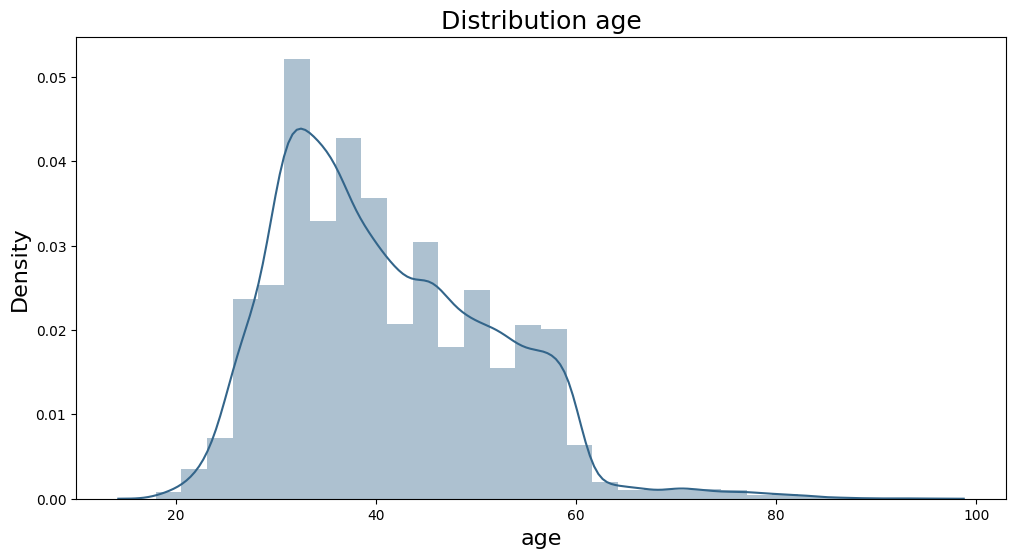

<ipython-input-66-b4d35fecb462>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color='#33658a', bins=30, kde=True)


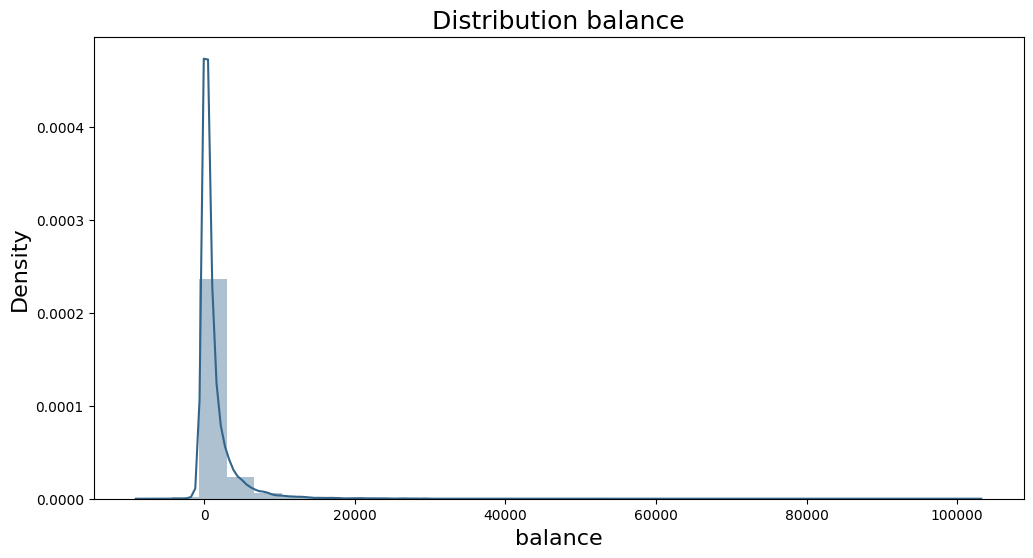

<ipython-input-66-b4d35fecb462>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color='#33658a', bins=30, kde=True)


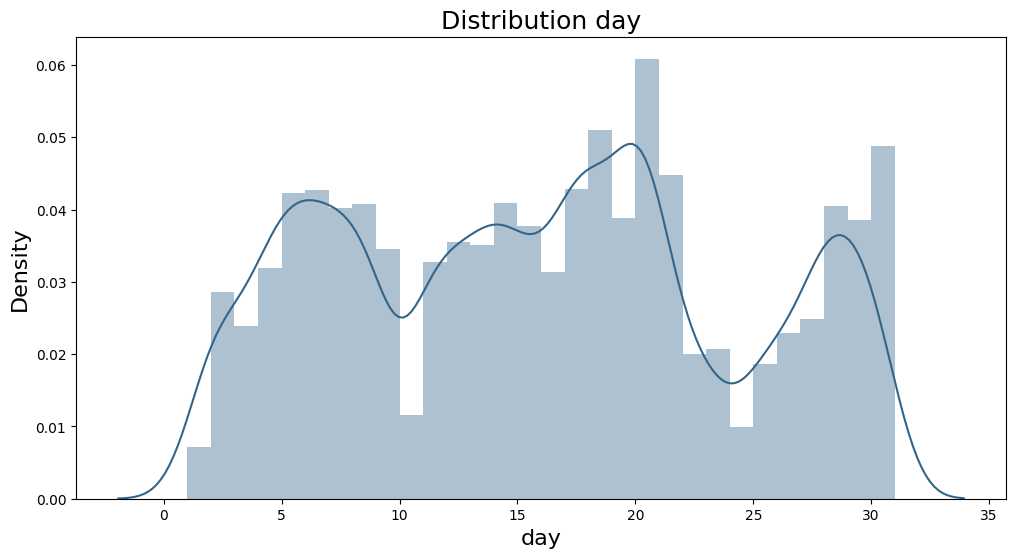

<ipython-input-66-b4d35fecb462>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color='#33658a', bins=30, kde=True)


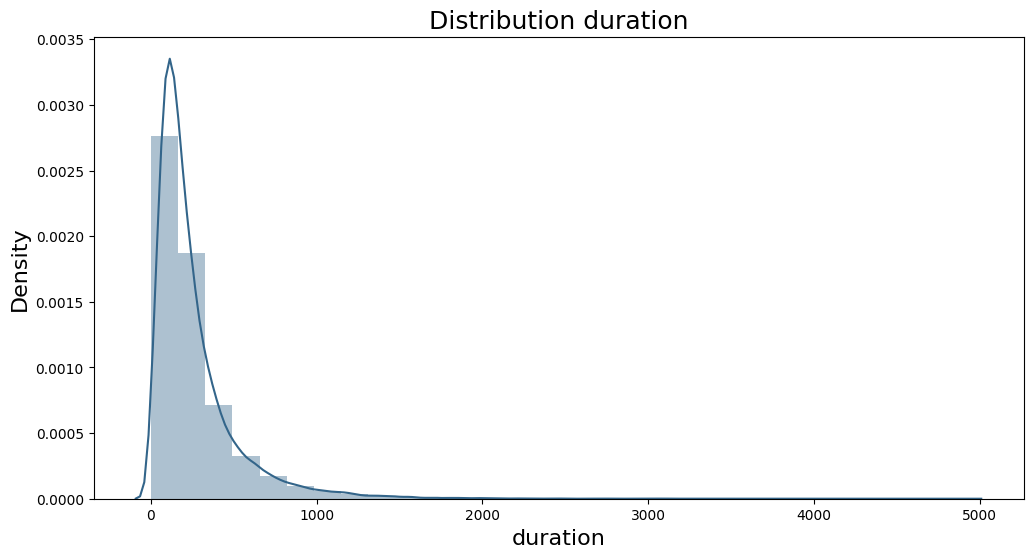

<ipython-input-66-b4d35fecb462>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color='#33658a', bins=30, kde=True)


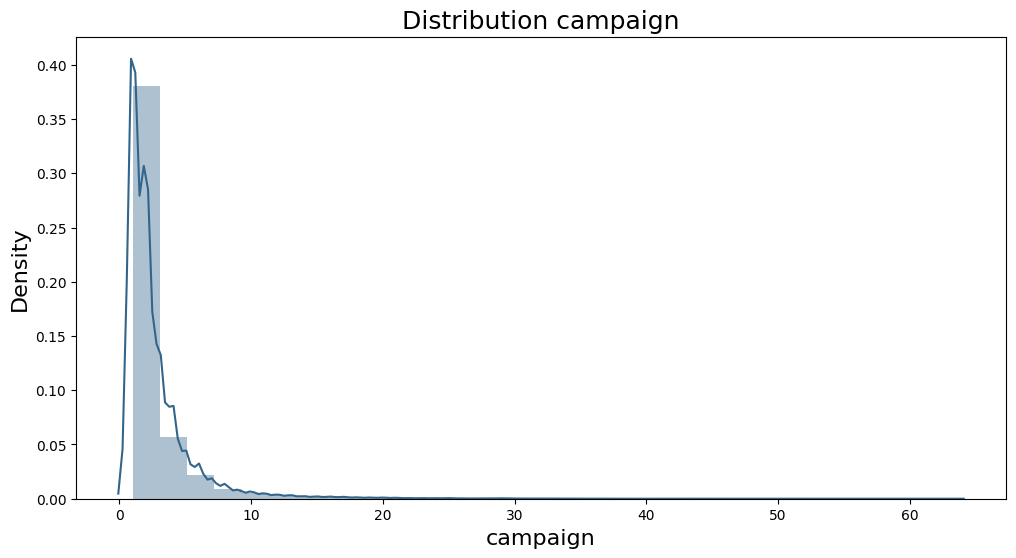

<ipython-input-66-b4d35fecb462>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color='#33658a', bins=30, kde=True)


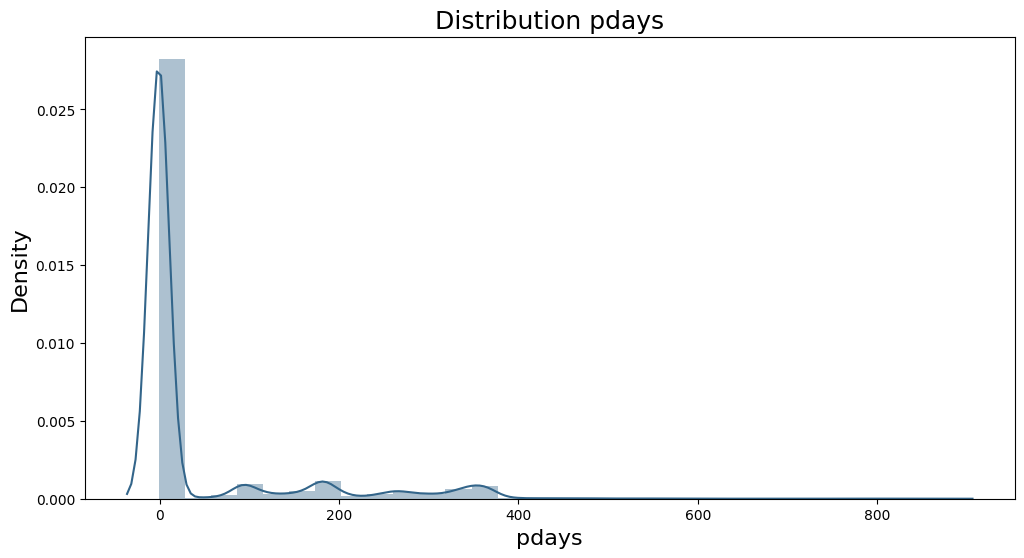

<ipython-input-66-b4d35fecb462>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color='#33658a', bins=30, kde=True)


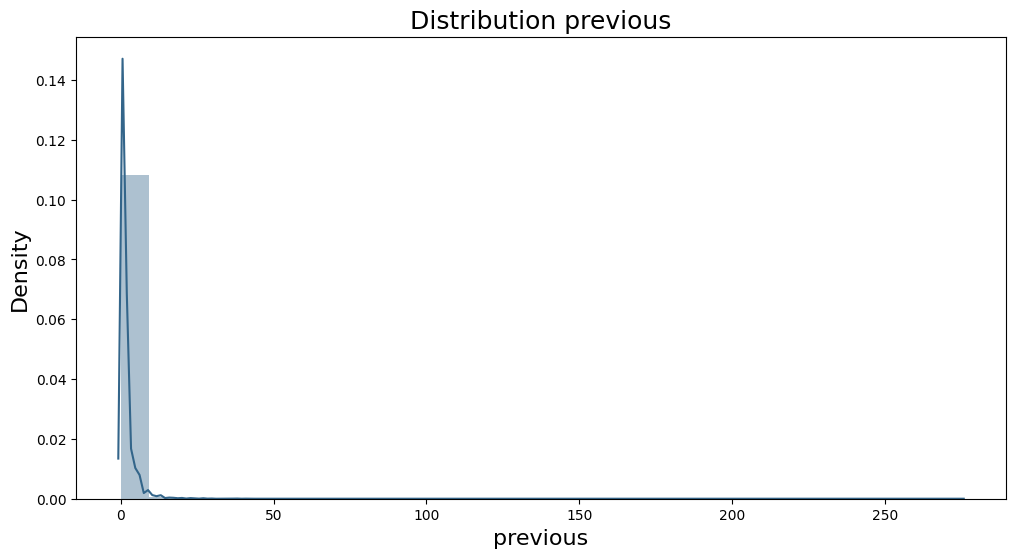

In [66]:
numeric = df.select_dtypes(include='number').columns
for i in numeric:
  plt.figure(figsize=(12,6))
  sns.distplot(df[i], color='#33658a', bins=30, kde=True)
  plt.xlabel(i,size=16)
  plt.ylabel('Density',size=16)
  plt.title(f'Distribution {i}',size=18)
  plt.show()

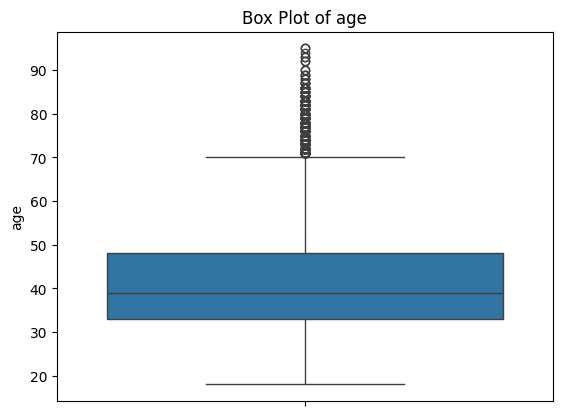

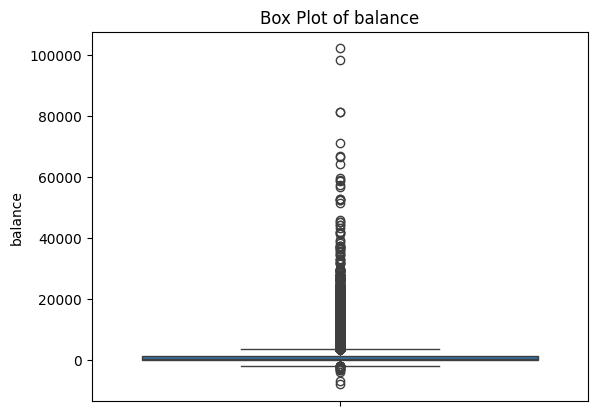

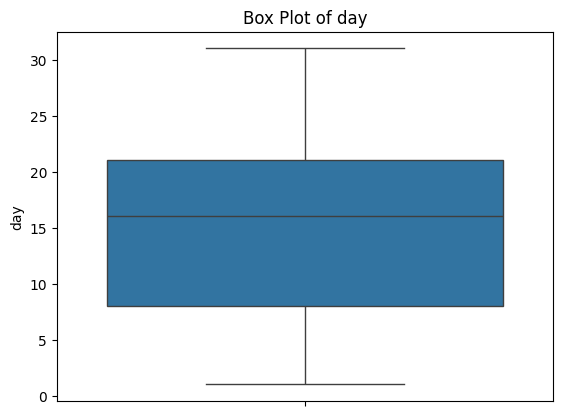

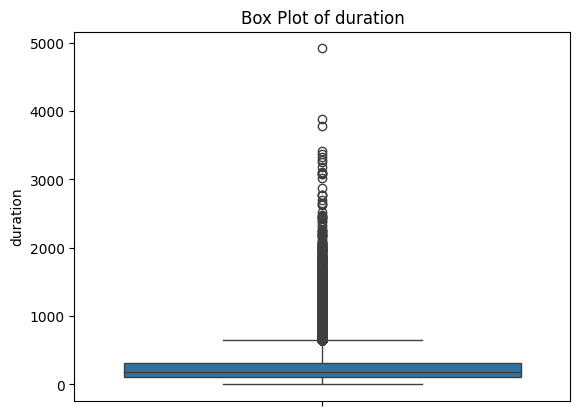

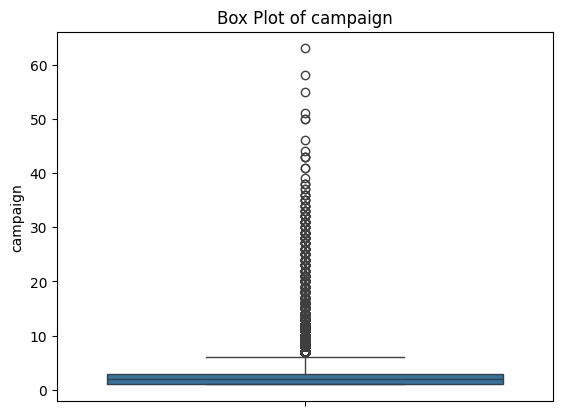

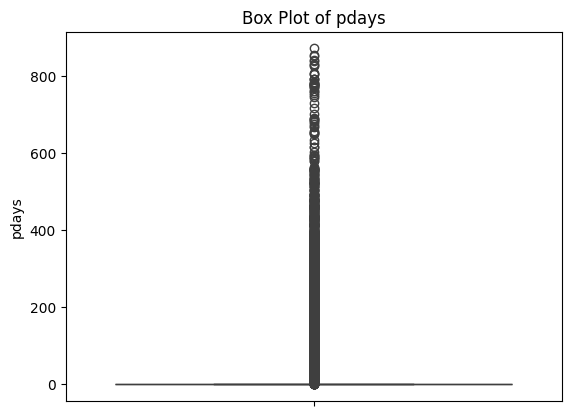

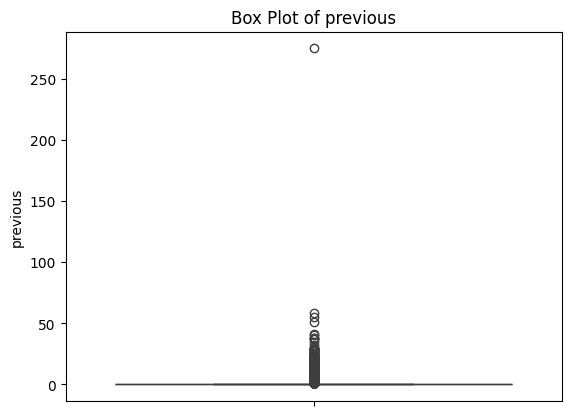

In [72]:
for i in numeric:
  sns.boxplot(df[i])
  plt.title(f"Box Plot of {i}")
  plt.show()

Based on the distribution plots and Box Plots we clearly have Outliers in our data. So lets explore more on them.

In [ ]:
df['age'].